In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from read_data import get_data_df, get_data_numpy
from preprocessing import remove_missing_features, remove_repeat_patients

In [2]:
data = get_data_df()
data.shape

/Users/kierstencampbell/emory/courses/ml/cs534-ml-project/diabetes_project/read_data.py:17: DtypeWarning: Columns (10) have mixed types. Specify dtype option on import or set low_memory=False.
  return pd.read_csv(data_path, na_values=["?"])


(101766, 50)

In [3]:
# Remove repeat patients & include new feature with number of times repeated
data = remove_repeat_patients(data, new_feature=True, return_type = 'dataframe')
data.shape

40


(71518, 51)

Text(0.5, 1.0, 'Records from duplicate patients')

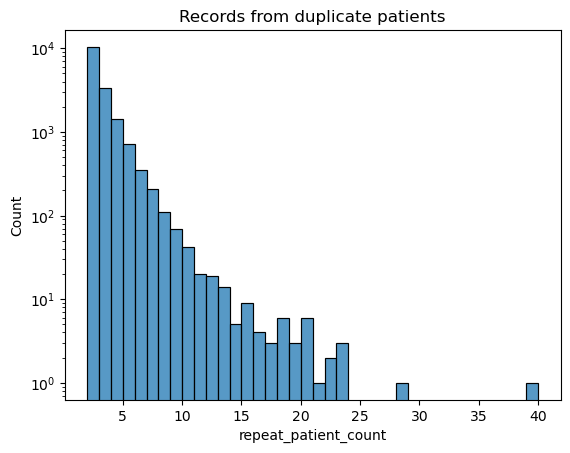

In [4]:
# Histogram of repeat patient count - how many times does each unique patient appear in the original record set?
sns.histplot(data[data.repeat_patient_count > 1], x = 'repeat_patient_count', 
             binwidth = 1, log_scale = (False, 10))
plt.title("Records from duplicate patients")

<Axes: xlabel='repeat_patient_count', ylabel='Count'>

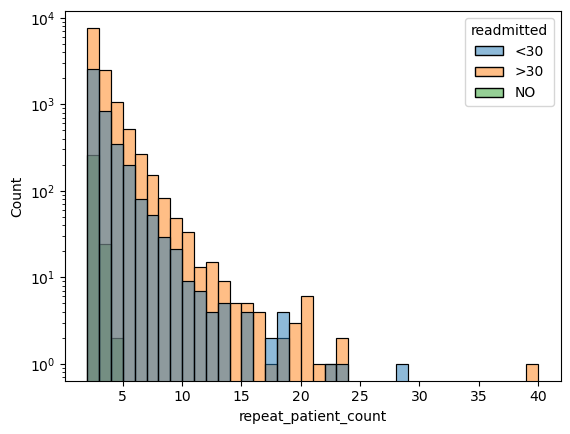

In [5]:
sns.histplot(data[data.repeat_patient_count > 1], x = 'repeat_patient_count', hue = 'readmitted',
             binwidth = 1, log_scale = (False, 10))

In [48]:
# Count % missing data in each numeric feature
n_records = data.shape[0]
data_missing = []
columns = []
for column in data:
    missing_perc = data[column].isnull().sum()/n_records
    columns.append(column)
    data_missing.append(missing_perc*100) 

In [27]:
for column in data:
    print(column + ": " + str(data[column].dtype))
    if(str(data[column].dtype) == 'object'):
        print(data[column].unique())
        print(sum(data[column].isna()))
    if(str(data[column].dtype) == 'int64'):
        print(sum(data[column].isna()))
        print(sum(data[column].isnull()))
        
    print("\n\n")

encounter_id: int64
0
0



patient_nbr: int64
0
0



race: object
['Caucasian' 'AfricanAmerican' nan 'Other' 'Asian' 'Hispanic']
1948



gender: object
['Female' 'Male' 'Unknown/Invalid']
0



age: object
['[0-10)' '[10-20)' '[20-30)' '[30-40)' '[40-50)' '[50-60)' '[60-70)'
 '[70-80)' '[80-90)' '[90-100)']
0



weight: object
[nan '[75-100)' '[50-75)' '[0-25)' '[100-125)' '[25-50)' '[125-150)'
 '[175-200)' '[150-175)' '>200']
68665



admission_type_id: int64
0
0



discharge_disposition_id: int64
0
0



admission_source_id: int64
0
0



time_in_hospital: int64
0
0



payer_code: object
[nan 'MC' 'MD' 'HM' 'UN' 'BC' 'SP' 'CP' 'SI' 'DM' 'CM' 'CH' 'PO' 'WC' 'OT'
 'OG' 'MP' 'FR']
31043



medical_specialty: object
['Pediatrics-Endocrinology' nan 'InternalMedicine'
 'Family/GeneralPractice' 'Cardiology' 'Surgery-General' 'Orthopedics'
 'Gastroenterology' 'Surgery-Cardiovascular/Thoracic' 'Nephrology'
 'Orthopedics-Reconstructive' 'Psychiatry' 'Emergency/Trauma'
 'Pulmonology' 'Surgery-Neur

['None' '>7' '>8' 'Norm']
0



metformin: object
['No' 'Steady' 'Up' 'Down']
0



repaglinide: object
['No' 'Up' 'Steady' 'Down']
0



nateglinide: object
['No' 'Steady' 'Down' 'Up']
0



chlorpropamide: object
['No' 'Steady' 'Down' 'Up']
0



glimepiride: object
['No' 'Steady' 'Down' 'Up']
0



acetohexamide: object
['No' 'Steady']
0



glipizide: object
['No' 'Steady' 'Up' 'Down']
0



glyburide: object
['No' 'Steady' 'Up' 'Down']
0



tolbutamide: object
['No' 'Steady']
0



pioglitazone: object
['No' 'Steady' 'Up' 'Down']
0



rosiglitazone: object
['No' 'Steady' 'Up' 'Down']
0



acarbose: object
['No' 'Steady' 'Up']
0



miglitol: object
['No' 'Steady' 'Down' 'Up']
0



troglitazone: object
['No' 'Steady']
0



tolazamide: object
['No' 'Steady']
0



examide: object
['No']
0



citoglipton: object
['No']
0



insulin: object
['No' 'Up' 'Steady' 'Down']
0



glyburide-metformin: object
['No' 'Steady' 'Down' 'Up']
0



glipizide-metformin: object
['No' 'Steady']
0



glimepiride-pi

<Axes: >

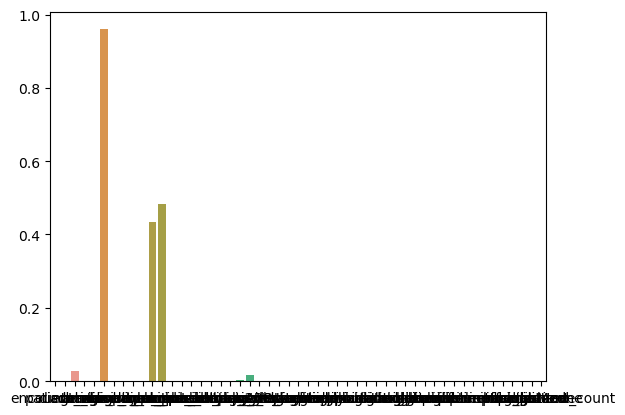

In [50]:
sns.barplot(x = columns, y = data_missing)

In [ ]:
for column in data:
    